#### Project Statement:
Examine the data provided related to features of used cars in order to create a predictive model for pricing used vehicles.

Project will be accomplished by exploratory data analysis, cleaning and scaling the data, treating outliers, dividing the data into training and testing groups, then building and tuning a multiple linear regression model.
___
___

# TABLE OF CONTENTS

#### 1. <a href = #link1>Import Libraries and the CSV</a>

#### 2. <a href = #link2>Exploratory Data Analysis</a>

#### 3. <a href = #link3>Data Cleaning and Preparation</a>

#### 4. <a href = #link4>Outlier Treatment and Scaling</a>

#### 5. <a href = #link5>Train and Test</a>

#### 6. <a href = #link6>Linear Regression with statsmodels</a>

#### 7. <a href = #link7>Checking Assumptions</a>

#### 8. <a href = #link8>Conclusions</a>

___
___

## <a id='link1'> 1. Import Libraries and the CSV of the data </a>

In [1]:
# Import essential libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from scipy.stats import tmean

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data into the notebook
# Look at the first few rows

data = pd.read_csv('used_cars_data.csv')
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
# Make a copy of the data set.  Name it df.

df = data[['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']].copy()
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
# Number of rows and columns in the data set

df.shape

(7253, 14)

In [5]:
# What columns are present in this data set?

df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

### Data Dictionary 

• S.No. : Serial Number

• Name : Name of the car which includes Brand name and Model name

• Location : The location in which the car is being sold or is available for purchase Cities

• Year : Manufacturing year of the car

• Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.

• Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

• Transmission : The type of transmission used by the car. (Automatic / Manual)

• Owner : Type of ownership

• Mileage : The standard mileage offered by the car company in kmpl or km/kg

(Mileage here refers to the number of miles/kilometers a car can travel in one liter/kilogram of fuel. There are mostly 2 units kmpl which refers to kilometers per liter and km/kg which refers to kilometer per kilogram. 1 Liter is equivalent to 0.264172 Gallons.  We need not convert the units, details can be used as is because the Fuel type feature will help to identify this information. You can remove the units and use it as a numerical feature.)

• Engine : The displacement volume of the engine in CC.

• Power : The maximum power of the engine in bhp.

BHP or Brake Horse Power is the unit of power of an engine which determines the acceleration and top speed of a vehicle. Higher the BHP higher the power of an engine.

• Seats : The number of seats in the car.

• New_Price : The price of a new car of the same model in INR Lakhs.

(1 Lakh = 100, 000, 1 Crore = 1,000,000,000.  1 CR = 100 LK)

• Price : The price of the used car in INR Lakhs 

(1 Lakh = 100, 000, 1 Crore = 1,000,000,000.  1 CR = 100 LK)

___

## <a id='link2'> 2. Exploratory Data Analysis</a>

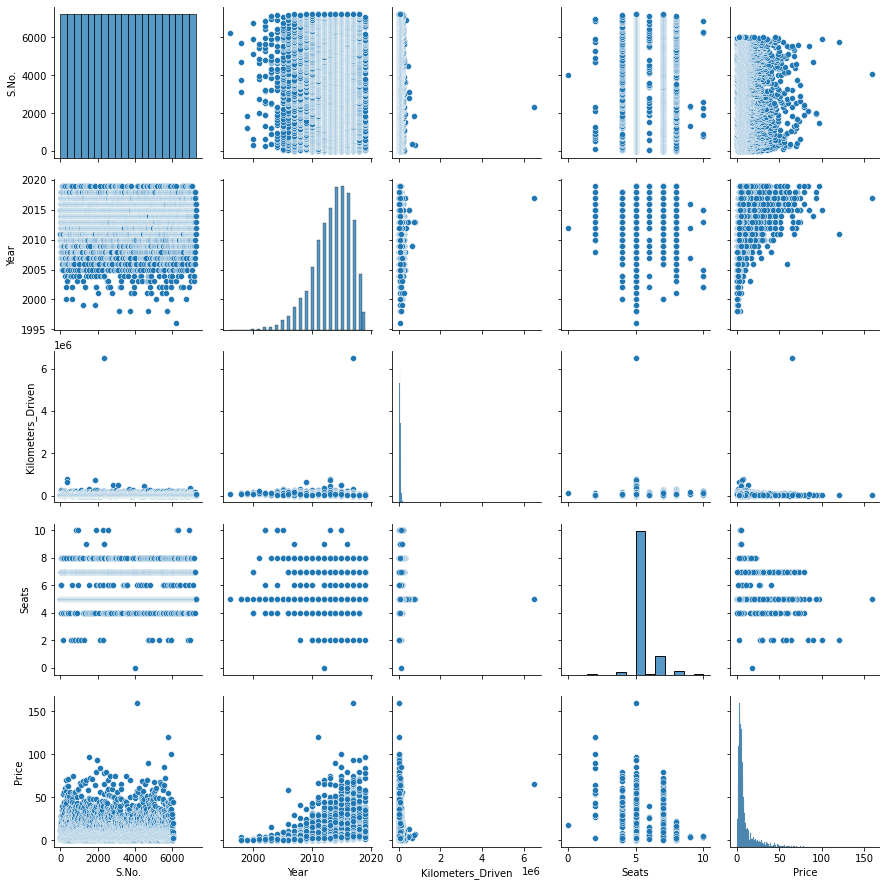

In [6]:
sns.pairplot(df)

#### Observations

• S.No. is uniformly distributed.  This is to be expected since it is essentially just an index column.

• Year is skewed left.  Most cars in the data set appear to be from 2010 or later.

• Kilometers_Driven appears to have an extreme outlier, making the distribution artificially skewed.

• The vast majority of cars appear to have 5 seats.

• Price is skewed right.  Extreme outliers may exist.  Some cars in the data set are far more expensive than the rest.

• Some columns that should be present in the pair plot are missing due to having an incorrect data type.

### Convert columns to correct data types in order to proceed with EDA

In [7]:
# Examine the number of non-null entries per column and the data type of each column.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [8]:
# Examine the structure of the data in each column.

df.sample(n=20)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4468,4468,Honda Amaze SX i-VTEC,Mumbai,2014,29000,Petrol,Manual,First,18.0 kmpl,1198 CC,86.7 bhp,5.0,NaN,4.25
1120,1120,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Hyderabad,2013,34700,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,24.50
1763,1763,Chevrolet Cruze LTZ,Mumbai,2011,65000,Diesel,Manual,First,17.9 kmpl,1998 CC,163.7 bhp,5.0,NaN,4.55
6302,6302,Toyota Camry MT with Moonroof,Chennai,2009,90000,Petrol,Manual,First,13.4 kmpl,2362 CC,164.7 bhp,5.0,NaN,NaN
5332,5332,Maruti Celerio ZXI MT,Bangalore,2015,48808,Petrol,Manual,First,23.1 kmpl,998 CC,67.04 bhp,5.0,6.05 Lakh,4.30
2543,2543,BMW 3 Series 320d,Hyderabad,2013,58000,Diesel,Automatic,First,13.2 kmpl,1995 CC,170 bhp,5.0,NaN,19.50
5652,5652,Toyota Fortuner 4x4 MT,Jaipur,2014,122000,Diesel,Manual,Second,12.55 kmpl,2982 CC,168.5 bhp,7.0,NaN,16.00
2050,2050,Mahindra Scorpio S4 7 Seater,Mumbai,2014,83128,Diesel,Manual,First,15.4 kmpl,2179 CC,120 bhp,7.0,NaN,7.45
2583,2583,Maruti Swift Dzire VDi,Kolkata,2015,35000,Diesel,Manual,First,19.3 kmpl,1248 CC,73.9 bhp,5.0,NaN,4.75
6811,6811,Honda City i VTEC CVT VX,Hyderabad,2015,39822,Petrol,Automatic,First,18.0 kmpl,1497 CC,117.3 bhp,5.0,NaN,NaN


### Data Types (Good to Go)

• Name (name of the car) is an object, as it should be.  However, it may be more beneficial to break this into two columns: Make & Model.

• Year (that the car was manufactured) is an int64, this is ok.  I may consider changing this to a category later on, but I'll leave it as an integer for now.

• Kilometers_Driven (by previous owners) is an int64, as it should be.

• Price (of the used car) is a float64, as it should be.



### Data Types (Needs fixing)

• S.No. (Serial Number) is int64, but it should be an object.

• Location (city that car is being sold in) is an object, but it should be a category.

• Fuel_Type (Petrol, Diesel, Electric, CNG, LPG) is an object, but it should be category.

• Transmission (Auto/Manual) is an object, but it should be a category.

• Owner_Type (first, second, etc.) is an object, but it should be a category.

• Mileage (kmpl or km/kg) is an object, but it should be a float64.  Labels need to be removed.

• Engine (displacement volume of the engine in CC) is an object, but it should be a float64.  Labels need to be removed.

• Power (max power of engine in BHP) is an object, but it should be a float64.  Labels need to be removed.

• Seats (in the car) is a float64, but perhaps should be a category.  Investigate what values appear in this column first.

• New_Price (cost of the car if it were new) is an object, but should be a float64.  Labels need to be removed.  Some conversions may need to be done.

___
#### Convert df['S.No.'] to object

In [9]:
# Convert serial number to an object instead of an int64 because it is more like a name than a value.  
# Calculations will not be performed on this column.  It will not be included in the model.

df['S.No.'] = df['S.No.'].astype('object')


# Verify that the data type was changed.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   object 
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(10)
memory usage: 793.4+ KB


___
#### Convert df['Location'] to category

In [10]:
# First I want to know, what do the entries in this column look like?

val_counts_location = df['Location'].value_counts()
print(val_counts_location)

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64


In [11]:
# Since there are only a handful of cities, it would be better to have this column as a category rather than an object.

df['Location'] = df['Location'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   object  
 1   Name               7253 non-null   object  
 2   Location           7253 non-null   category
 3   Year               7253 non-null   int64   
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   object  
 6   Transmission       7253 non-null   object  
 7   Owner_Type         7253 non-null   object  
 8   Mileage            7251 non-null   object  
 9   Engine             7207 non-null   object  
 10  Power              7207 non-null   object  
 11  Seats              7200 non-null   float64 
 12  New_Price          1006 non-null   object  
 13  Price              6019 non-null   float64 
dtypes: category(1), float64(2), int64(2), object(9)
memory usage: 744.2+ KB


___
#### Convert df['Fuel_Type'] to category

In [12]:
# First, let's verify that the only entries in this column are what we were told to expect from the data dictionary (Petrol, Diesel, Electric, CBG, LPG)

val_counts_fuel_type = df['Fuel_Type'].value_counts(dropna = False)
print(val_counts_fuel_type)

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64


In [13]:
# Since I have confirmed that the only entries in this column are Petrol, Diesel, Eletric, CNG, and LPG, I am going to convert this column to a category data type.

df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   object  
 1   Name               7253 non-null   object  
 2   Location           7253 non-null   category
 3   Year               7253 non-null   int64   
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   category
 6   Transmission       7253 non-null   object  
 7   Owner_Type         7253 non-null   object  
 8   Mileage            7251 non-null   object  
 9   Engine             7207 non-null   object  
 10  Power              7207 non-null   object  
 11  Seats              7200 non-null   float64 
 12  New_Price          1006 non-null   object  
 13  Price              6019 non-null   float64 
dtypes: category(2), float64(2), int64(2), object(8)
memory usage: 694.9+ KB


___
#### Convert df['Transmission'] to category

In [14]:
# First, let's verify that the only entries in this column are what we were told to expect from the data dictionary (Automatic/Manual)

val_counts_transmission = df['Transmission'].value_counts(dropna = False)
print(val_counts_transmission)

Manual       5204
Automatic    2049
Name: Transmission, dtype: int64


In [15]:
# Since I have confirmed that the only entries in this column are Manual and Automatic, I am going to convert this column to a category data type.

df['Transmission'] = df['Transmission'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   object  
 1   Name               7253 non-null   object  
 2   Location           7253 non-null   category
 3   Year               7253 non-null   int64   
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   category
 6   Transmission       7253 non-null   category
 7   Owner_Type         7253 non-null   object  
 8   Mileage            7251 non-null   object  
 9   Engine             7207 non-null   object  
 10  Power              7207 non-null   object  
 11  Seats              7200 non-null   float64 
 12  New_Price          1006 non-null   object  
 13  Price              6019 non-null   float64 
dtypes: category(3), float64(2), int64(2), object(7)
memory usage: 645.4+ KB


___
#### Convert df['Owner_Type'] to category

In [16]:
# First, let's verify that the only entries in this column are what I assume I will see (first, second, third, etc.)

val_counts_owner_type = df['Owner_Type'].value_counts(dropna = False)
print(val_counts_owner_type)

First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64


In [17]:
# I know now that the only entries in the Owner_Type column are First, Second, Third, and Fourth & Above.
# Since I have confirmed that the only entries in this column are what I expected to see, I am going to convert this column to a category data type.

df['Owner_Type'] = df['Owner_Type'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   object  
 1   Name               7253 non-null   object  
 2   Location           7253 non-null   category
 3   Year               7253 non-null   int64   
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   category
 6   Transmission       7253 non-null   category
 7   Owner_Type         7253 non-null   category
 8   Mileage            7251 non-null   object  
 9   Engine             7207 non-null   object  
 10  Power              7207 non-null   object  
 11  Seats              7200 non-null   float64 
 12  New_Price          1006 non-null   object  
 13  Price              6019 non-null   float64 
dtypes: category(4), float64(2), int64(2), object(6)
memory usage: 596.0+ KB


___
#### Remove km/kg and kmpl from df['Mileage'], convert to float64, then impute the median for the np.nan's.

In [18]:
# Create a function to remove the km/kg and the kmpl labels by splitting each entry at the space, then returning the 0th element, which is the numbers.

def mileage_remove_labels(Mileage):
    if isinstance(Mileage, str):
        splt = Mileage.split(' ')
        return (splt[0])
    else:
        return np.nan

    
# Apply the function to the Mileage column.

df['Mileage'] = df['Mileage'].apply(mileage_remove_labels)


# Convert Mileage to float64 now that it contains only numbers, no lables.

df['Mileage'] = df['Mileage'].astype('float64')


# Check that it worked.

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   object  
 1   Name               7253 non-null   object  
 2   Location           7253 non-null   category
 3   Year               7253 non-null   int64   
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   category
 6   Transmission       7253 non-null   category
 7   Owner_Type         7253 non-null   category
 8   Mileage            7251 non-null   float64 
 9   Engine             7207 non-null   object  
 10  Power              7207 non-null   object  
 11  Seats              7200 non-null   float64 
 12  New_Price          1006 non-null   object  
 13  Price              6019 non-null   float64 
dtypes: category(4), float64(3), int64(2), object(5)
memory usage: 596.0+ KB


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,NaN,17.74


In [19]:
# There appears to be 2 null entries in the Mileage column.  Let's investigate.

df[df['Mileage'].isna()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


The cars that are missing their mileage are electric cars.  They don't have mileage because they don't run on fuel.  Two entries is not enough information to make a reliable predictive model for other electric cars.  I will choose to drop these two entries and tell my boss that the model only works for non-electric cars.

In [20]:
# Drop the electric cars from the data.

df.dropna(axis=0, how='any', subset=['Mileage'], inplace=True)


# Make sure it worked.

df[df['Mileage'].isna()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


___
#### Remove CC from df['Engine'] entries, then convert to float64

In [21]:
# Create a function to remove the CC labels by splitting each entry at the space, then returning the 0th element, which is the numbers.

def engine_remove_labels(Engine):
    if isinstance(Engine, str):
        splt = Engine.split(' ')
        return (splt[0])
    else:
        return np.nan

    
# Apply the function to the Engine column.

df['Engine'] = df['Engine'].apply(engine_remove_labels)


# Convert Mileage to float64 now that it contains only numbers, no lables.

df['Engine'] = df['Engine'].astype('float64')


# Check that it worked.

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7251 non-null   object  
 1   Name               7251 non-null   object  
 2   Location           7251 non-null   category
 3   Year               7251 non-null   int64   
 4   Kilometers_Driven  7251 non-null   int64   
 5   Fuel_Type          7251 non-null   category
 6   Transmission       7251 non-null   category
 7   Owner_Type         7251 non-null   category
 8   Mileage            7251 non-null   float64 
 9   Engine             7205 non-null   float64 
 10  Power              7205 non-null   object  
 11  Seats              7198 non-null   float64 
 12  New_Price          1005 non-null   object  
 13  Price              6017 non-null   float64 
dtypes: category(4), float64(4), int64(2), object(4)
memory usage: 652.3+ KB


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,NaN,17.74


___
#### Remove bhp from df['Power'] entries, then convert to float64

In [22]:
# Create a function to remove the bhp labels by splitting each entry at the space, then returning the 0th element, which is the numbers.


def power_remove_labels(Power):
    if isinstance(Power, str):
        splt = Power.split(' ')
        return (splt[0])
    else:
        return np.nan

    
# Apply the function to the Power column.

df['Power'] = df['Power'].apply(power_remove_labels)


# Convert Mileage to float64 now that it contains only numbers, no lables.

df.loc[df['Power'] == 'null', 'Power'] = np.nan

df['Power'] = df['Power'].astype('float64')


# Check that it worked.

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7251 non-null   object  
 1   Name               7251 non-null   object  
 2   Location           7251 non-null   category
 3   Year               7251 non-null   int64   
 4   Kilometers_Driven  7251 non-null   int64   
 5   Fuel_Type          7251 non-null   category
 6   Transmission       7251 non-null   category
 7   Owner_Type         7251 non-null   category
 8   Mileage            7251 non-null   float64 
 9   Engine             7205 non-null   float64 
 10  Power              7076 non-null   float64 
 11  Seats              7198 non-null   float64 
 12  New_Price          1005 non-null   object  
 13  Price              6017 non-null   float64 
dtypes: category(4), float64(5), int64(2), object(3)
memory usage: 652.3+ KB


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


___
Now that the columns appear to be the correct data type, let's take a look at the pair plot again.

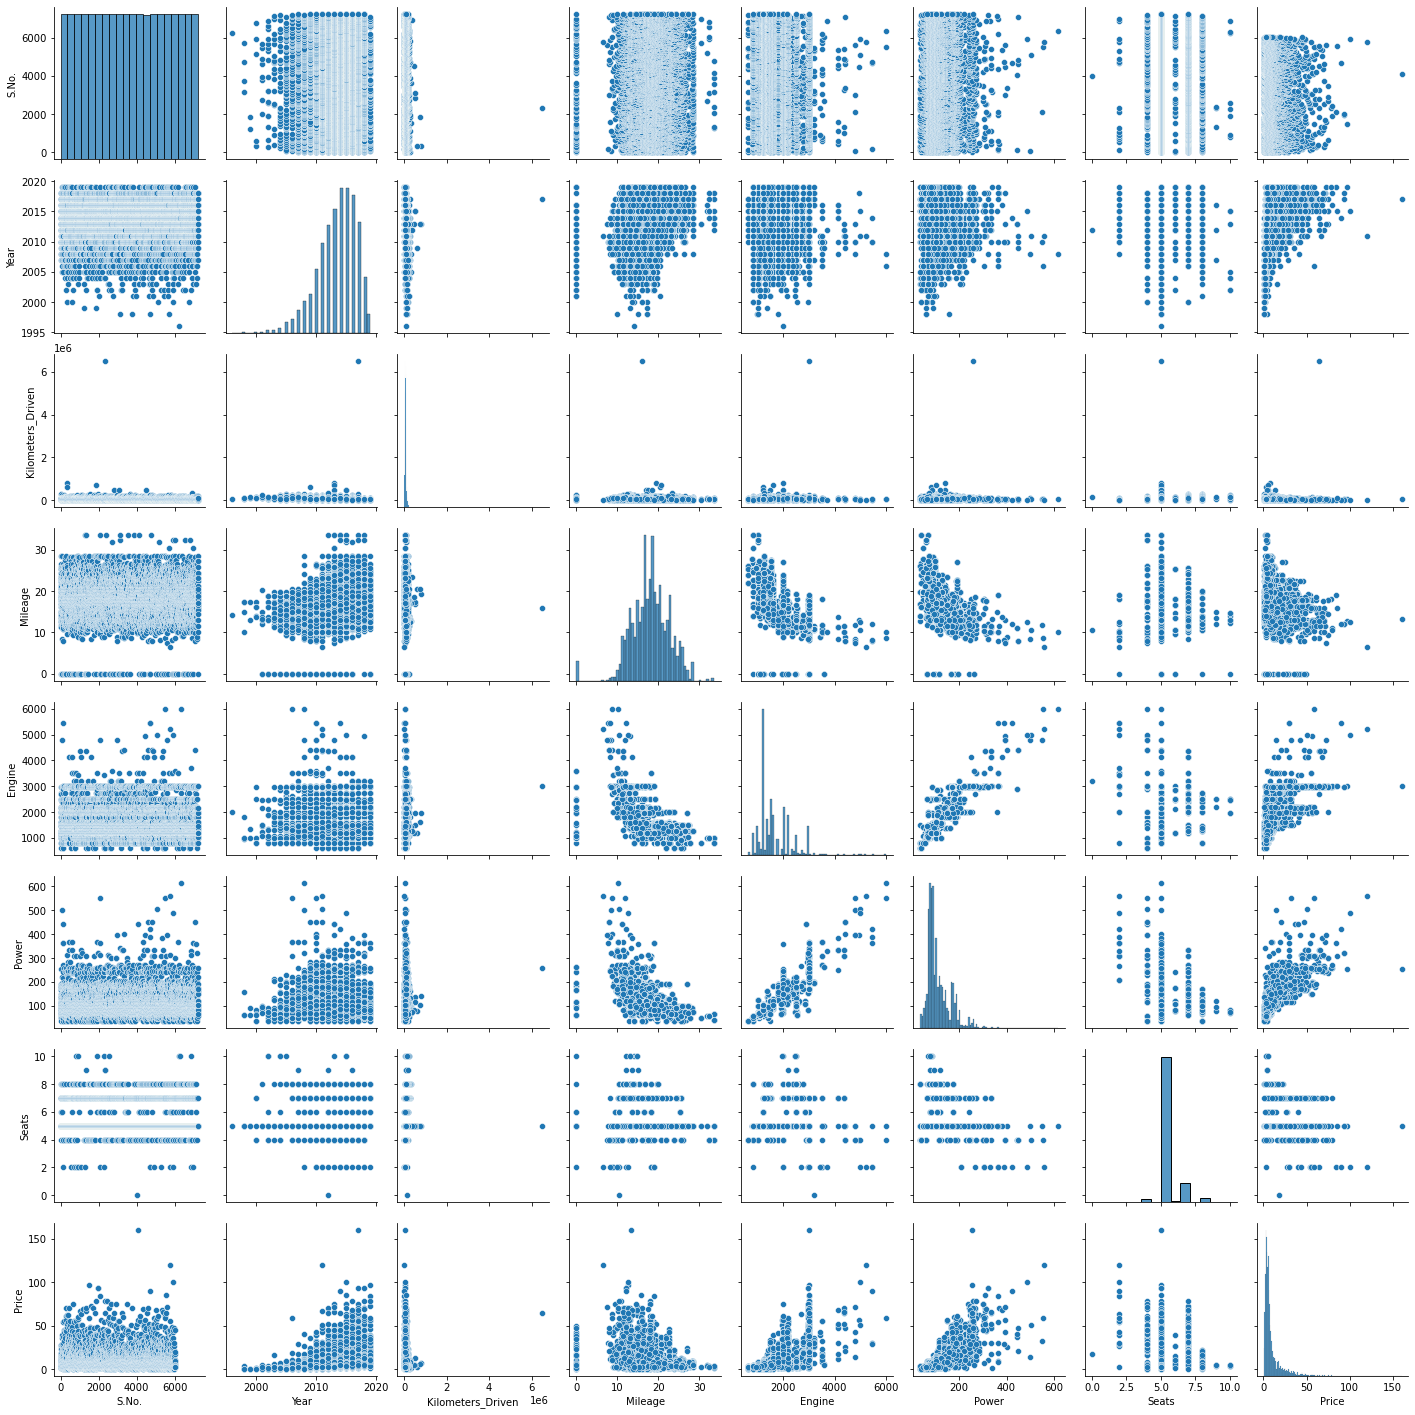

In [23]:
sns.pairplot(df)

#### New Observations

• Mileage appears to be somewhat normally distributed, with the exception of a moderate grouping near 0.

• Engine is very right skewed.  Most cars have an engine of 3000 or less, but some have engines as high as 6000.

• Power's distribution is very similar to Engine's distribution.  Most cars have a power of 200 or less, but some have power as high as 600.

### Univariate Analysis

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

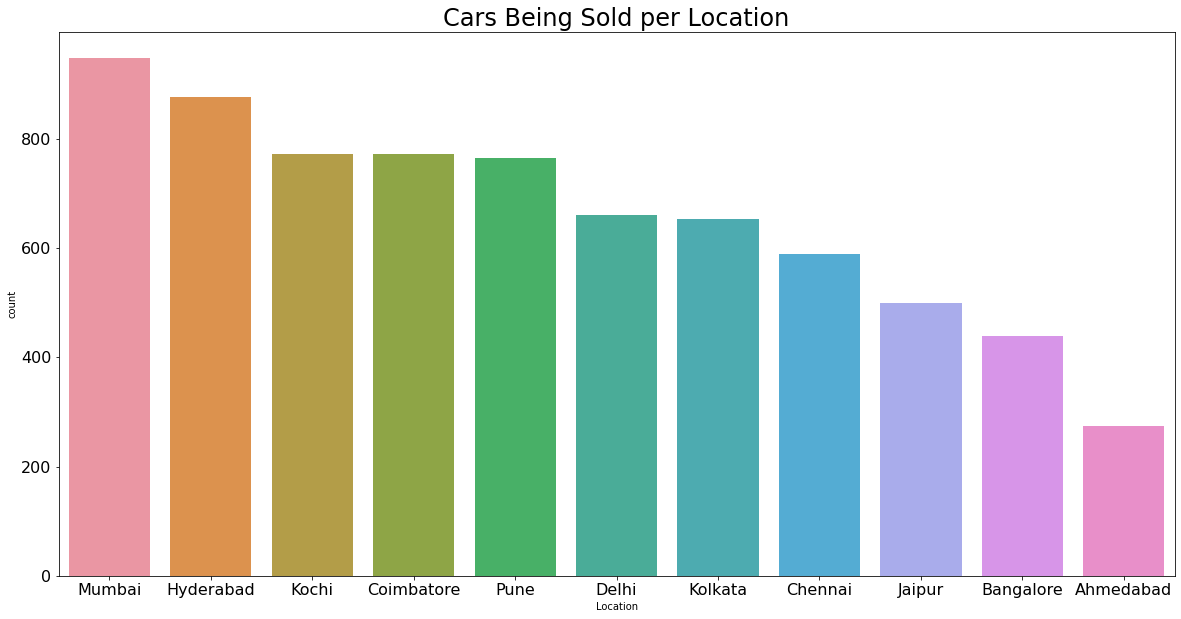

In [24]:
# Which locations have the most cars for sale in this data set?  Which have the least?

plt.figure(figsize = (20,10))
sns.countplot(df['Location'], order = df['Location'].value_counts().index).set_title('Cars Being Sold per Location', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

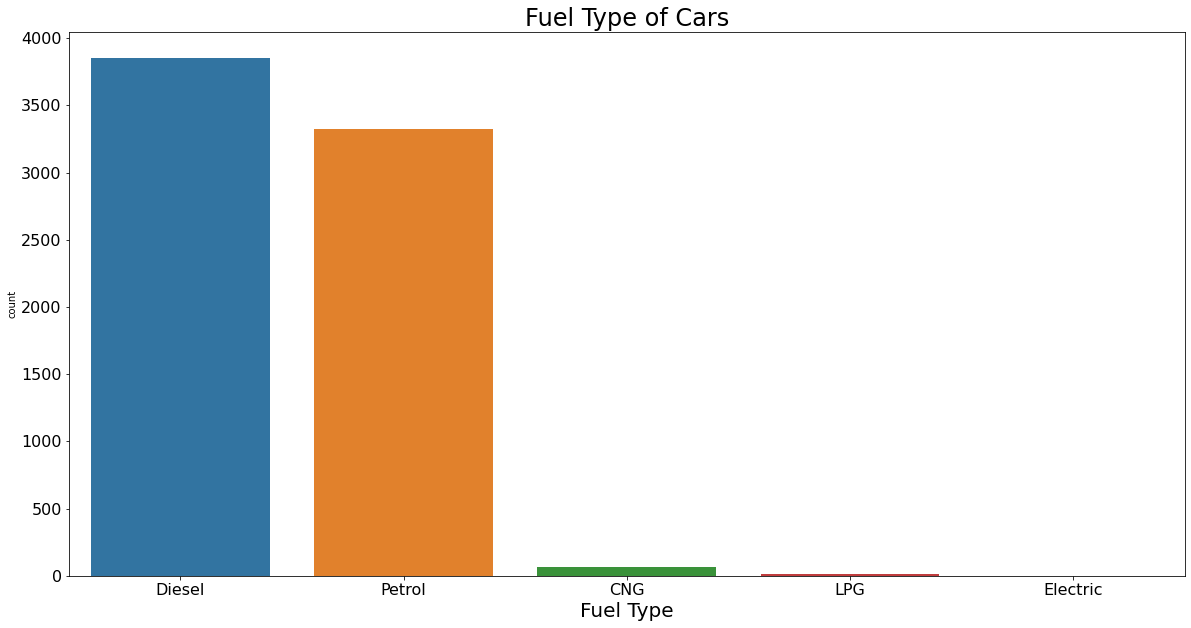

In [25]:
# Let's visualize the number of cars in the data set with each fuel type

plt.figure(figsize = (20,10))
sns.countplot(df['Fuel_Type'], order = df['Fuel_Type'].value_counts().index).set_title('Fuel Type of Cars', fontsize=24)
plt.xticks(fontsize=16)
plt.xlabel('Fuel Type', fontsize=20)
plt.yticks(fontsize=16)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

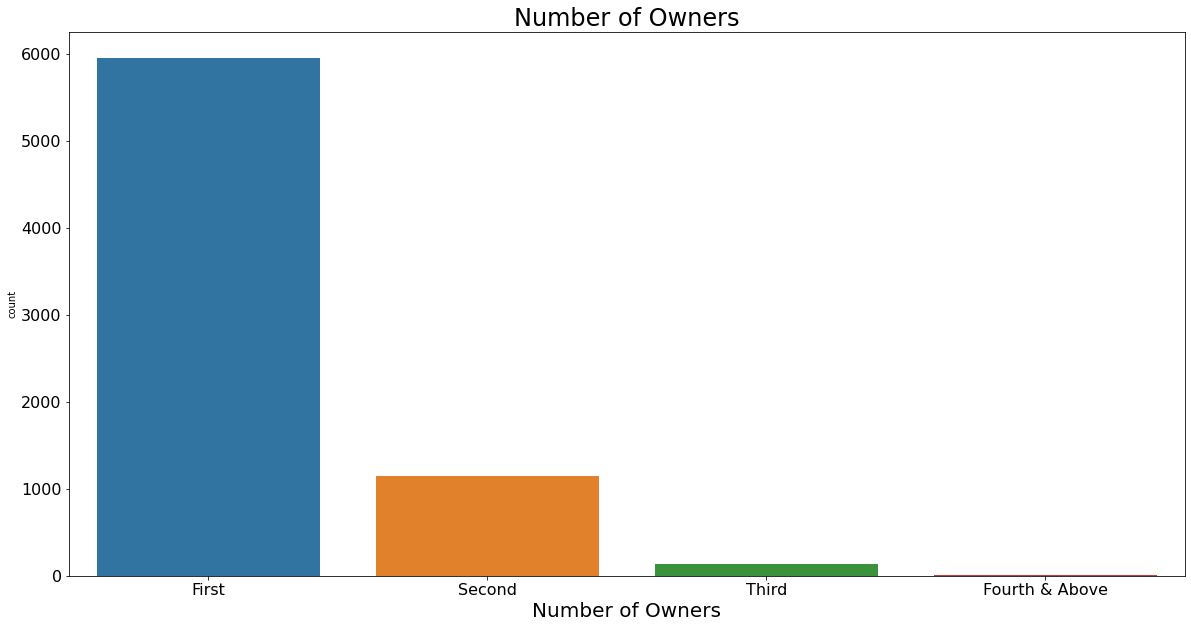

In [26]:
# Let's compare the number of owners the car has had to 

plt.figure(figsize = (20,10))
sns.countplot(df['Owner_Type'], order = df['Owner_Type'].value_counts().index).set_title('Number of Owners', fontsize=24)
plt.xticks(fontsize=16)
plt.xlabel('Number of Owners', fontsize=20)
plt.yticks(fontsize=16)

Text(0.5, 0, 'Number of Seats')

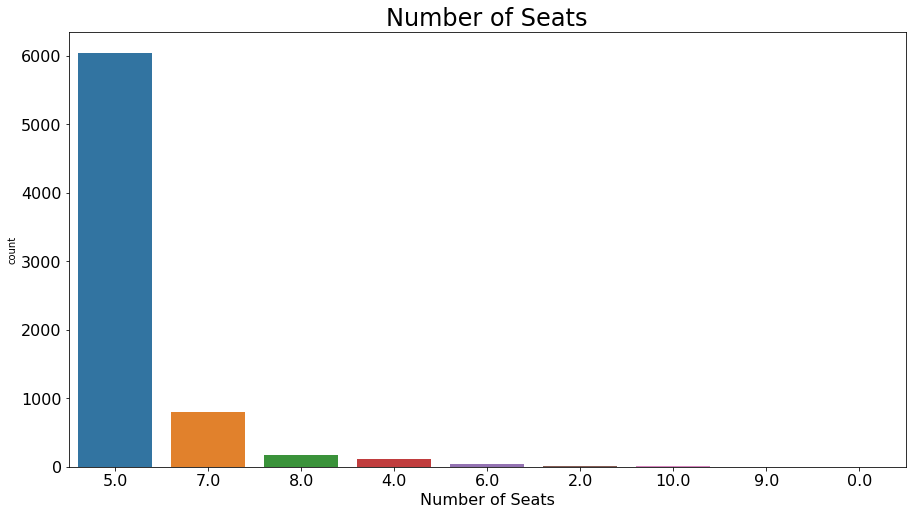

In [27]:
plt.figure(figsize = (15,8))
sns.countplot(df['Seats'], order=df['Seats'].value_counts().index).set_title('Number of Seats', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Number of Seats', fontsize=16)

<AxesSubplot:xlabel='Mileage', ylabel='Transmission'>

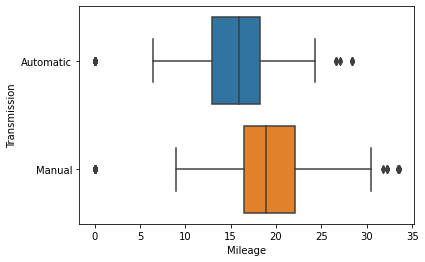

In [28]:
sns.boxplot(x=df['Mileage'], y=df['Transmission'])

<AxesSubplot:xlabel='Power', ylabel='Fuel_Type'>

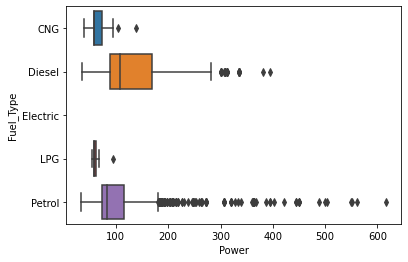

In [29]:
sns.boxplot(x=df['Power'], y=df['Fuel_Type'])

<AxesSubplot:xlabel='Price', ylabel='Owner_Type'>

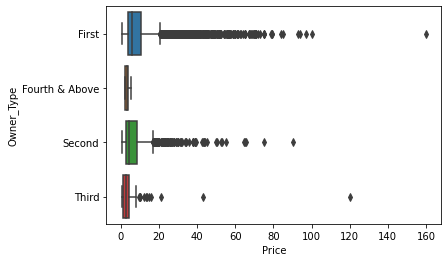

In [30]:
sns.boxplot(x=df['Price'], y=df['Owner_Type'])

### Bivariate Analysis

<AxesSubplot:>

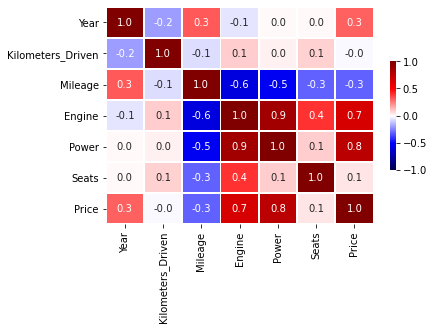

In [31]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
corr = (df[numeric_columns].corr())

sns.heatmap(
    corr,
    cmap="seismic",
    annot=True,
    fmt=".1f",
    vmin=-1,
    vmax=1,
    center=0,
    square=False,
    linewidths=0.7,
    cbar_kws={"shrink": 0.5},
)

#### Observations

• Power and Engine are very highly positively correlated.  As the size of the engine increases, the power of the engine increases.  Larger engines are more powerful.

• Power and Price are very highly positively correlated.  As the power of the engine increases, the price of the vehicle increases.  Powerful engines are more expensive.

• Engine and Price are highly positively correlated.  As the size of the engine increases, the price of the vehicle increases.  Large engines are more expensive.

• Engine and Mileage are negatively correlated.  As the size of the engine increases, the kilometers per liter of fuel decreases.  Larger engines are less fuel-efficient.

• Power and Mileage are negatively correlated.  As the power of the engine increases, the kilometers per liter of fuel decreases.  Powerful engines are less fuel-efficient

• Engine and Seats are somewhat positively correlated.  As the number of seats in the car increases, the size of the engine increases.  Larger cars tend to have bigger engines.

• Year and Price are somewhat positively correlated.  As the year of manufacture of the vehicle increases, the price of the vehicle increases.  Newer cars are more expensive.

• Year and Mileage are somewhat positively correlated.  As the year of manufacture of the vehicle increases, the the kilometers per liter of fuel increases.  Newer cars are more fuel-efficient.

Text(0, 0.5, 'Size of the Engine, CC')

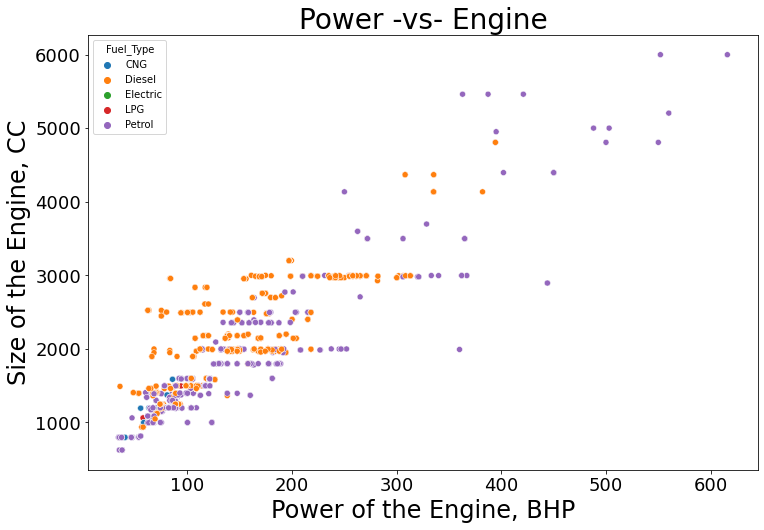

In [32]:
# Compare Power, Engine, and Fuel Type

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Power', y='Engine', hue='Fuel_Type', data=df).set_title('Power -vs- Engine', fontsize=28)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Power of the Engine, BHP', fontsize=24)
plt.ylabel('Size of the Engine, CC', fontsize=24)

• Power and Engine are clearly highly positively correlated.

• The vehicles with the largest and most powerful engines tend to run on Petrol.

• Vehicles that run on CNG and LPG tend to have much smaller and weaker engines.

Text(0, 0.5, 'Price of Car, Lakh')

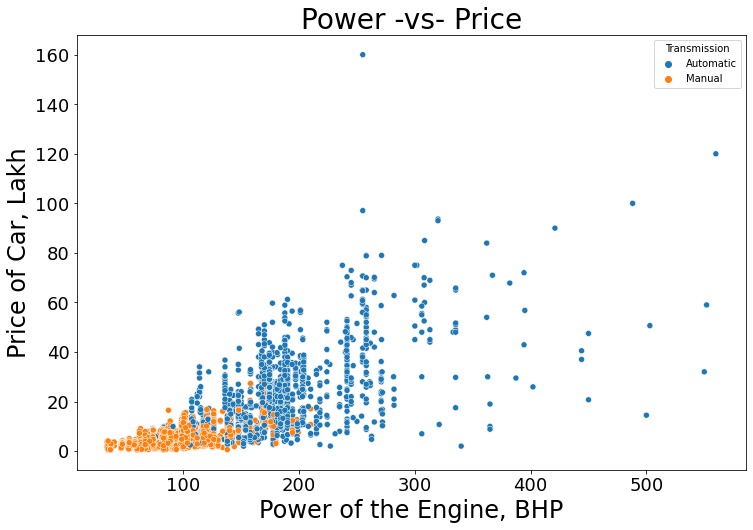

In [33]:
# Compare Power, Price, and Transmission

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Power', y='Price', hue='Transmission', data=df).set_title('Power -vs- Price', fontsize=28)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Power of the Engine, BHP', fontsize=24)
plt.ylabel('Price of Car, Lakh', fontsize=24)

• Power and Price are somewhat positively correlated.  The vehicles with the most powerful engines tend to be more expensive.

• The vehicles with manual transmissions tend to be much cheaper and less powerful than vehicles with automatic transmissions.

• There is much higher variation in power and price amongst vehicles with automatic transmissions.

Text(0, 0.5, 'Mileage, kmkg or kmpl')

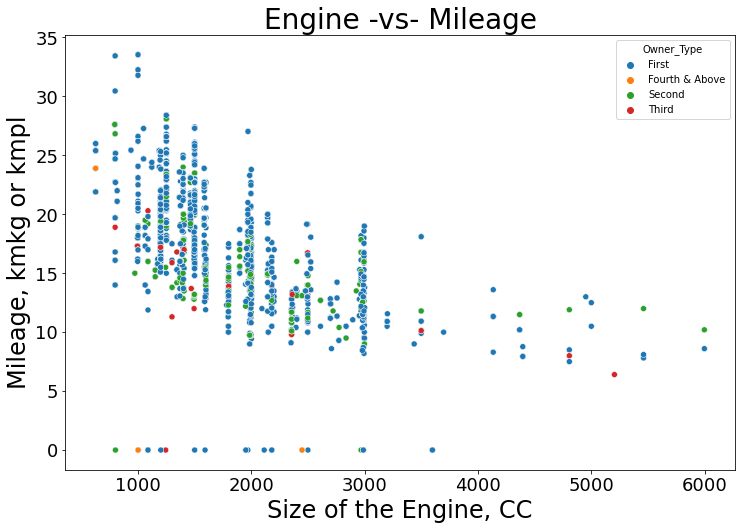

In [34]:
# Compare Engine, Mileage

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Engine', y='Mileage', hue='Owner_Type', data=df).set_title('Engine -vs- Mileage', fontsize=28)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Size of the Engine, CC', fontsize=24)
plt.ylabel('Mileage, kmkg or kmpl', fontsize=24)

• Engine and Mileage are somewhat negatively correlated.  The vehicles with the largest engines tend to be less fuel-efficient.

• There doesn't appear to be a pattern amongst the number of owners the vehicle has had in comparison to its engine size and mileage.

• There appears to be a few vehicles with 0 mileage.  This warrants further investigation.

___
___

## <a id='link3'> 3. Data Cleaning and Preparation </a>

___
### Clean the Mileage column

In [35]:
# Let's examine the entries with "0" mileage. 

df[df['Mileage'] == 0]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
14,14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,17.50
67,67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,49.14 Lakh,35.67
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.30
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,NaN,2.95
229,229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.0,NaN,NaN,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6633,6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,0.0,NaN,NaN,NaN,NaN,NaN
6697,6697,Hyundai Santro Xing XL,Jaipur,2007,85000,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,NaN
6857,6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
6957,6957,Honda Jazz 2020 Petrol,Kochi,2019,11574,Petrol,Manual,First,0.0,1199.0,88.7,NaN,NaN,NaN


In [36]:
# No obvious pattern amongst the entries with "0" mileage.  Lets convert these rows to np.nan, then fill nulls with the median.
df.loc[df['Mileage'] == 0, 'Mileage'] = np.nan

df['Mileage'].fillna(df['Mileage'].median(), inplace = True)

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

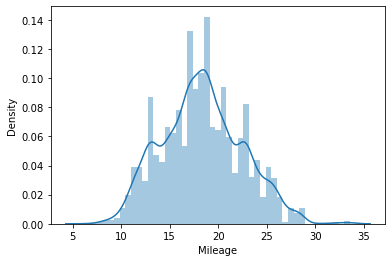

In [37]:
# Let's visualize mileage now that the "0"s have been removed.  Looks close to normal.

sns.distplot(df['Mileage'])

___
### Clean the Engine column

In [38]:
# Check how many values are missing in Engine

df['Engine'].isna().value_counts()

False    7205
True       46
Name: Engine, dtype: int64

In [39]:
# Examine missing entries for Engine

df[df['Engine'].isna()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,18.20,NaN,NaN,NaN,NaN,2.95
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,2.11
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,NaN,1.75
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,18.20,NaN,NaN,NaN,NaN,26.50
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,NaN,3.20
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,5.80
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,18.20,NaN,NaN,NaN,NaN,1.50
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,18.20,NaN,NaN,NaN,NaN,40.88
2074,2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,3.15
2096,2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,18.20,NaN,NaN,NaN,NaN,1.93


Interestingly, all of the rows that are missing "Engine", are also missing "Power", "Seats", and "New_Price" as well.  And a few are missing "Price" as well as the previously mentioned features.  That's a lot of missing information.  

Therefore, the rows that are missing an entry for "Engine" are not very useful for my model, so I will drop them.

In [40]:
# Drop the entries from the data set for which Engine is np.nan

df.dropna(axis=0, how='any', subset=['Engine'], inplace=True)


# Check that it worked.

df[df['Engine'].isna()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


___
### Clean the Power column

In [41]:
# Check how many values are missing in Power.

df['Power'].isna().value_counts()

False    7076
True      129
Name: Power, dtype: int64

In [42]:
# Examine missing entries for Power

df[df['Power'].isna()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,NaN,5.0,NaN,2.00
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,18.20,1086.0,NaN,5.0,NaN,1.30
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,NaN,5.0,NaN,2.10
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,NaN,0.85
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,NaN,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6891,6891,Toyota Etios GD,Kolkata,2013,60000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,NaN
6896,6896,Toyota Etios Liva GD,Hyderabad,2013,86000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,NaN
6947,6947,Toyota Etios Liva G,Delhi,2012,77800,Petrol,Manual,First,18.30,1197.0,NaN,5.0,NaN,NaN
7092,7092,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,2007,64168,Petrol,Automatic,First,17.00,1086.0,NaN,5.0,NaN,NaN


In [43]:
# Look for patterns amongst the 129 cars that are missing their Power.  Determine how many of each car is missing Power.

df2 = df[df['Power'].isna()]
df2.groupby(by=['Name'])['Name'].count()

Name
Audi A4 3.2 FSI Tiptronic Quattro           1
Chevrolet Optra 1.6 Elite                   1
Fiat Petra 1.2 EL                           1
Fiat Siena 1.2 ELX                          1
Ford Endeavour Hurricane LE                 1
Ford Endeavour XLT TDCi 4X4                 1
Ford Fiesta 1.4 SXI Duratorq                1
Ford Fiesta 1.4 SXi TDCi                    4
Ford Fiesta 1.6 SXI ABS Duratec             1
Hindustan Motors Contessa 2.0 DSL           1
Honda CR-V Sport                            1
Hyundai Santro AT                           1
Hyundai Santro DX                           1
Hyundai Santro GLS I - Euro I               2
Hyundai Santro GLS I - Euro II              3
Hyundai Santro GS                           1
Hyundai Santro GS zipDrive - Euro II        1
Hyundai Santro LP - Euro II                 1
Hyundai Santro LS zipDrive Euro I           1
Hyundai Santro LS zipPlus                   2
Hyundai Santro Xing XG AT eRLX Euro III     1
Hyundai Santro Xing XG eRLX E

In [44]:
# Let's see if we can locate some of these missing Power values in other rows of the data set.
# To whoever is reading/grading this, I completed the following process for all cars listed above that had 2 or more nulls.  
# However, I only kept the ones for which I found other entries in the data set that I could use to impute the missing values.

df[df['Name'] == 'Toyota Etios Liva GD']

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
556,556,Toyota Etios Liva GD,Chennai,2013,179000,Diesel,Manual,First,23.59,1364.0,67.04,5.0,NaN,3.80
1068,1068,Toyota Etios Liva GD,Pune,2012,225000,Diesel,Manual,Second,23.59,1364.0,NaN,5.0,NaN,2.60
1649,1649,Toyota Etios Liva GD,Pune,2011,32000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,3.85
3307,3307,Toyota Etios Liva GD,Delhi,2013,64000,Diesel,Manual,First,23.59,1364.0,67.06,5.0,NaN,3.10
3781,3781,Toyota Etios Liva GD,Coimbatore,2015,49894,Diesel,Manual,First,23.59,1364.0,67.06,5.0,NaN,5.27
3932,3932,Toyota Etios Liva GD,Delhi,2014,63000,Diesel,Manual,First,23.59,1364.0,67.04,5.0,NaN,4.35
4080,4080,Toyota Etios Liva GD,Mumbai,2011,74000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,3.60
4354,4354,Toyota Etios Liva GD,Delhi,2012,72351,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,2.65
4954,4954,Toyota Etios Liva GD,Coimbatore,2013,62601,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,4.67
6022,6022,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,NaN


In [45]:
df.loc[df['Name'] == 'Toyota Etios Liva GD', 'Power'] = 67.06

In [46]:
df[df['Name'] == 'Maruti Swift VDI BSIV W ABS']

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2164,2164,Maruti Swift VDI BSIV W ABS,Hyderabad,2010,86514,Diesel,Manual,First,17.8,1248.0,NaN,5.0,NaN,4.25
3439,3439,Maruti Swift VDI BSIV W ABS,Pune,2010,63600,Diesel,Manual,Second,17.8,1248.0,NaN,5.0,NaN,3.10
3628,3628,Maruti Swift VDI BSIV W ABS,Coimbatore,2016,70478,Diesel,Manual,First,17.8,1248.0,NaN,5.0,NaN,6.86
3930,3930,Maruti Swift VDI BSIV W ABS,Bangalore,2015,62588,Diesel,Manual,First,17.8,1248.0,NaN,5.0,NaN,5.95
5065,5065,Maruti Swift VDI BSIV W ABS,Hyderabad,2016,64000,Diesel,Manual,First,17.8,1248.0,NaN,5.0,NaN,5.99
6445,6445,Maruti Swift VDI BSIV W ABS,Coimbatore,2016,69564,Diesel,Manual,First,17.8,1248.0,NaN,5.0,NaN,NaN


In [47]:
df.loc[df['Name'] == 'Maruti Swift VDI BSIV', 'Power'] = 74.0

In [48]:
df[df['Name'] == 'Toyota Etios GD']

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
366,366,Toyota Etios GD,Kolkata,2014,45000,Diesel,Manual,First,23.59,1364.0,67.05,5.0,NaN,3.25
934,934,Toyota Etios GD,Kolkata,2012,60000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,2.95
2107,2107,Toyota Etios GD,Hyderabad,2015,116000,Diesel,Manual,Second,23.59,1364.0,67.05,5.0,NaN,5.80
2262,2262,Toyota Etios GD,Bangalore,2012,58253,Diesel,Manual,Second,23.59,1364.0,NaN,5.0,NaN,4.45
2393,2393,Toyota Etios GD,Chennai,2012,150000,Diesel,Manual,Third,23.59,1364.0,NaN,5.0,NaN,3.00
3247,3247,Toyota Etios GD,Chennai,2011,79000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,4.67
3898,3898,Toyota Etios GD,Coimbatore,2013,46496,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,5.30
5985,5985,Toyota Etios GD,Delhi,2013,70000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,3.88
6278,6278,Toyota Etios GD,Bangalore,2012,90000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,NaN
6891,6891,Toyota Etios GD,Kolkata,2013,60000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,NaN


In [49]:
df.loc[df['Name'] == 'Toyota Etios GD', 'Power'] = 67.05

In [50]:
df[df['Name'] == 'Toyota Etios Liva G']

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
829,829,Toyota Etios Liva G,Mumbai,2012,29605,Petrol,Manual,First,18.30,1197.0,NaN,5.0,NaN,2.44
2441,2441,Toyota Etios Liva G,Kolkata,2011,42118,Petrol,Manual,First,18.30,1197.0,NaN,5.0,NaN,2.19
2936,2936,Toyota Etios Liva G,Chennai,2015,53713,Petrol,Manual,First,17.71,1197.0,78.9,5.0,NaN,4.20
3779,3779,Toyota Etios Liva G,Kochi,2015,52207,Petrol,Manual,First,17.71,1197.0,78.9,5.0,NaN,4.56
4156,4156,Toyota Etios Liva G,Pune,2014,80102,Petrol,Manual,First,17.71,1197.0,78.9,5.0,NaN,3.50
6947,6947,Toyota Etios Liva G,Delhi,2012,77800,Petrol,Manual,First,18.30,1197.0,NaN,5.0,NaN,NaN
7145,7145,Toyota Etios Liva G,Kolkata,2012,37212,Petrol,Manual,First,18.30,1197.0,NaN,5.0,NaN,NaN


In [51]:
df.loc[df['Name'] == 'Toyota Etios Liva G', 'Power'] = 78.9

In [52]:
# How many nulls are left after imputing power values from existing data?

df['Power'].isna().value_counts()

False    7108
True       97
Name: Power, dtype: int64

There was originally 129 missing entries for Power, but after imputing values from existing points in the data, we are down to 97 nulls.  I will choose to impute the median for the remaining missing values for Power.

In [53]:
# Replace missing entries in Power with the median of Power
df['Power'].fillna(df['Power'].median(), inplace = True)

# Check to make sure that there are no more missing entries.
df[df['Power'].isna()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


In [54]:
# Verify that one of the entries that previously had no value for Power now has the median for its Power.

df[df['S.No.'] == 76.0]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8,1399.0,94.0,5.0,NaN,2.0


___
### Clean the Price column

In [55]:
# Determine how many of each car is missing its Price

df2 = df[df['Price'].isna()]
df2.groupby(by=['Name'])['Name'].count()

Name
Audi A3 35 TDI Attraction                     1
Audi A3 35 TDI Premium Plus                   1
Audi A4 2.0 TDI                               5
Audi A4 2.0 TDI 177 Bhp Technology Edition    1
Audi A4 2.0 TDI Multitronic                   1
                                             ..
Volvo S60 D5 Kinetic                          1
Volvo S80 D5                                  1
Volvo V40 Cross Country D3                    1
Volvo XC60 D4 SUMMUM                          1
Volvo XC90 2007-2015 D5 AWD                   2
Name: Name, Length: 760, dtype: int64

There are a lot of missing entries for Price, it is way too much to Google and manually impute.  There does not appear to be any pattern to the missing entries.  The distribution for price is very skewed, so I certainly would not impute the mean.  Even imputing the median for that many missing entries feels irresponsible.  I'll choose to drop the NaNs from the Price column instead.

In [56]:
df.dropna(axis=0, how='any', subset=['Price'], inplace=True)

___
### Clean the Seats column

In [57]:
# Let's see what the entries in this column look like.

val_counts_seats = df['Seats'].value_counts(dropna = False)
print(val_counts_seats)

5.0     5012
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
NaN        6
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64


In [58]:
# Why does one of the cars have zero seats? 

df[df['Seats'] == 0]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3999,3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,94.0,0.0,NaN,18.0


In [59]:
# Google says this car should have 5 seats, so I will replace 0.0 with 5.0.

df.replace(to_replace=0.0, value=5.0, inplace=True)


# Check that it worked.

val_counts_seats = df['Seats'].value_counts(dropna = False)
print(val_counts_seats)

5.0     5013
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
NaN        6
10.0       5
9.0        3
Name: Seats, dtype: int64


In [60]:
# Let's examine the entries for which "Seats" is missing

pd.set_option('display.max_rows', 200)
df[df['Seats'].isna()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
229,229.0,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,18.2,1498.0,99.0,NaN,NaN,3.60
1917,1917.0,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0,1493.0,100.0,NaN,NaN,1.70
2369,2369.0,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,94.0,NaN,NaN,1.50
3800,3800.0,Ford Endeavour Hurricane LE,Mumbai,2012,129000,Diesel,Automatic,First,12.8,2953.0,94.0,NaN,NaN,7.00
3882,3882.0,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061.0,94.0,NaN,NaN,2.50
5893,5893.0,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061.0,94.0,NaN,NaN,1.75


Three out of the seven missing entries are for the same type of car, "Maruti Estilo LXI."  A quick Google search tells me that the seats for this car should be 5.  So I will manually impute this value.

A quick Google search also tells me that the "Ford Figo Diesel", "Honda City 1.5 EXI", and "Honda Jazz 2020 Petrol" have 5 seats as well.  So I will manually impute these values.  

The "For Endeavour Hurricane LE" seats 7.  I will manually impute this value.

Additionally, four other entries for "Honda City 1.5 EXI" exist in the data already, and they all have a value of "5.0" for Seats, which confirms that "5.0" is the correct value to impute here.  Unfortunately, none of the other cars have partners in the data set for me to compare them to, so I will have to assume that the information I found on Google is correct.

In [61]:
# Impute 5.0 for the number of seats for a Ford Figo Diesel.

df.loc[df['Name'] == 'Ford Figo Diesel', 'Seats'] = 5.0


# Check that it worked.

df[df['Name'] == 'Ford Figo Diesel']

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
229,229.0,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,18.2,1498.0,99.0,5.0,NaN,3.6


In [62]:
# Impute 5.0 for the number of seats for a Honda City 1.5 EXI.

df.loc[df['Name'] == 'Honda City 1.5 EXI', 'Seats'] = 5.0


# Check that it worked.

df[df['Name'] == 'Honda City 1.5 EXI']

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1279,1279.0,Honda City 1.5 EXI,Pune,2005,98437,Petrol,Manual,First,13.0,1493.0,100.0,5.0,NaN,1.15
1917,1917.0,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0,1493.0,100.0,5.0,NaN,1.70
3721,3721.0,Honda City 1.5 EXI,Jaipur,2005,123000,Petrol,Manual,Third,13.0,1493.0,100.0,5.0,NaN,1.10
3806,3806.0,Honda City 1.5 EXI,Pune,2001,125943,Petrol,Manual,Second,13.0,1493.0,100.0,5.0,NaN,1.45
5957,5957.0,Honda City 1.5 EXI,Coimbatore,2004,186679,Petrol,Manual,Second,13.0,1493.0,100.0,5.0,NaN,1.76


In [63]:
# Impute 5.0 for the number of seats for a Maruti Estilo LXI.

df.loc[df['Name'] == 'Maruti Estilo LXI', 'Seats'] = 5.0


# Check that it worked.

df[df['Name'] == 'Maruti Estilo LXI']

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2369,2369.0,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,94.0,5.0,NaN,1.50
3882,3882.0,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061.0,94.0,5.0,NaN,2.50
5893,5893.0,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061.0,94.0,5.0,NaN,1.75


In [64]:
# Impute 5.0 for the number of seats for a Honda Jazz 2020 Petrol.

df.loc[df['Name'] == 'Honda Jazz 2020 Petrol', 'Seats'] = 5.0


# Check that it worked.

df[df['Name'] == 'Honda Jazz 2020 Petrol']

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


In [65]:
# Impute 7.0 for the number of seats for a Ford Endeavour Hurricane LE.

df.loc[df['Name'] == 'Ford Endeavour Hurricane LE', 'Seats'] = 7.0


# Check that it worked.

df[df['Name'] == 'Ford Endeavour Hurricane LE']

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3800,3800.0,Ford Endeavour Hurricane LE,Mumbai,2012,129000,Diesel,Automatic,First,12.8,2953.0,94.0,7.0,NaN,7.0


In [66]:
# Check that Seats no longer has missing values.

df[df['Seats'].isna()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


___
### Break the Name column into a Make column and a Model column

In [67]:
# Create a function to split the Name column into Make and Model

def name_make_split(Name):
    if isinstance(Name, str):
        splt = Name.split(' ', maxsplit=1)
        return (splt[0])
    else:
        return np.nan

    
def name_model_split(Name):
    if isinstance(Name, str):
        splt = Name.split(' ', maxsplit=1)
        return (splt[1])
    else:
        return np.nan

    
# Apply the function to the Name column to create the Make column.

df['Make'] = df['Name'].apply(name_make_split)


# Apply the function to the Name column to create the Make column.

df['Model'] = df['Name'].apply(name_model_split)


# Check that it worked.

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5981 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              5981 non-null   float64 
 1   Name               5981 non-null   object  
 2   Location           5981 non-null   category
 3   Year               5981 non-null   int64   
 4   Kilometers_Driven  5981 non-null   int64   
 5   Fuel_Type          5981 non-null   category
 6   Transmission       5981 non-null   category
 7   Owner_Type         5981 non-null   category
 8   Mileage            5981 non-null   float64 
 9   Engine             5981 non-null   float64 
 10  Power              5981 non-null   float64 
 11  Seats              5981 non-null   float64 
 12  New_Price          823 non-null    object  
 13  Price              5981 non-null   float64 
 14  Make               5981 non-null   object  
 15  Model              5981 non-null   object  
dtypes: cat

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make,Model
0,5.0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon R LXI CNG
1,1.0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,2.0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda,Jazz V
3,3.0,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga VDI
4,4.0,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic


___
### Bin the Year column

<AxesSubplot:xlabel='Year', ylabel='count'>

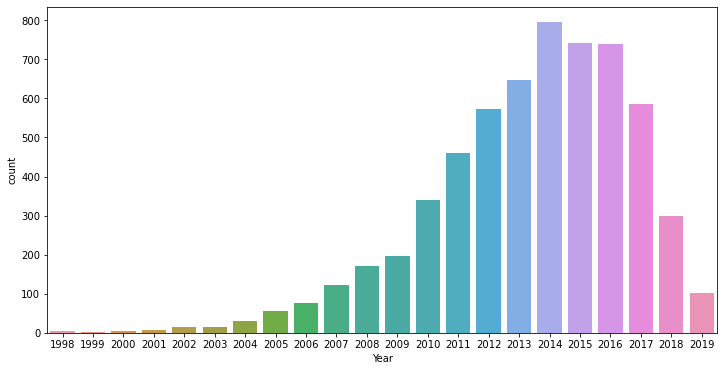

In [68]:
plt.figure(figsize=(12,6))
sns.countplot(df['Year'])

In [69]:
df['Year_Bin'] = pd.cut(df['Year'], [-np.inf, 2000, 2005, 2010, 2015, np.inf], 
                       labels = ['Before 2000', '2001-2005', '2006-2010', '2011-2015', '2016-2020'])

In [70]:
df['Year_Bin'].value_counts()

2011-2015      3219
2016-2020      1726
2006-2010       905
2001-2005       121
Before 2000      10
Name: Year_Bin, dtype: int64

___
___

## <a id='link4'>4. Outlier Treatment and Scaling </a>

### Remove Engine outliers

<AxesSubplot:xlabel='Engine', ylabel='Density'>

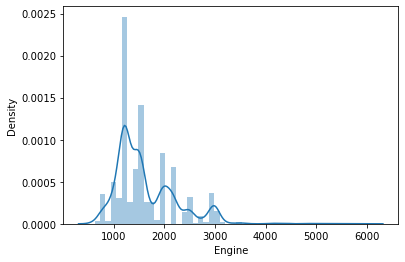

In [71]:
# Let's visualize the Engine column.

sns.distplot(df['Engine'])

The distribution is skewed right.  This means that most cars have 3000 or less for their engine, but there are a few (such as sports cars) that have more than that - as high as 6000 or so.

In [72]:
def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)
    return df

In [73]:
df = treat_outliers(df, 'Engine')

<AxesSubplot:xlabel='Engine', ylabel='Density'>

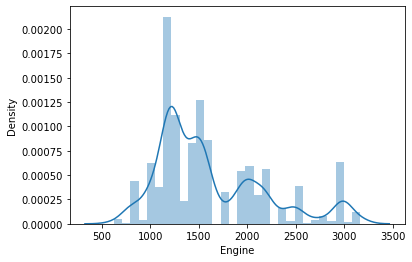

In [74]:
# Let's visualize the Engine column again, now that the outliers have been removed.

sns.distplot(df['Engine'])

The outliers were removed, but this column is still somewhat skewed. I will convert it to a log scale so it performs better in the model.

In [75]:
# Create a new column for the log scaled version of the Engine column.

df['Engine_Log'] = np.log(df['Engine']+1)
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make,Model,Year_Bin,Engine_Log
0,5.0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon R LXI CNG,2006-2010,6.906755
1,1.0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option,2011-2015,7.367077
2,2.0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda,Jazz V,2011-2015,7.090077
3,3.0,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga VDI,2011-2015,7.130099
4,4.0,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic,2011-2015,7.585281


<AxesSubplot:xlabel='Engine_Log', ylabel='Density'>

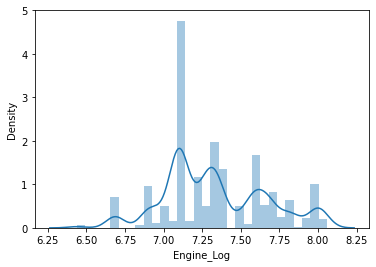

In [76]:
# Let's visualize the Engine_Log column to verify that its skew is decreased.

sns.distplot(df['Engine_Log'])

The distribution looks a little more normal now.  

___
### Remove Power outliers

<AxesSubplot:xlabel='Power', ylabel='Density'>

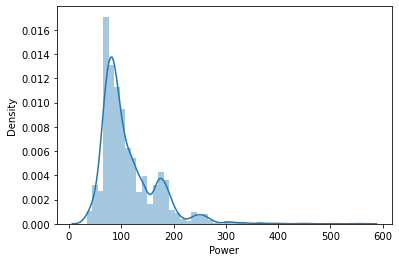

In [77]:
# Let's visualize the Power column

sns.distplot(df['Power'])

The distribution is skewed right.  This means that most cars have 200 or less for their engine, but there are a few (such as sports cars) that have more than that - as high as 600 or so.

In [78]:
# Let's remove the outliers

df = treat_outliers(df, 'Power')

<AxesSubplot:xlabel='Power', ylabel='Density'>

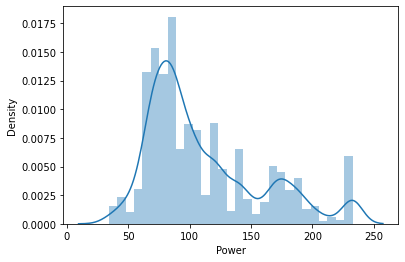

In [79]:
# Let's visualize the Power column again, now that the outliers have been removed.

sns.distplot(df['Power'])

Power is still somewhat skewed.  I will convert it to a log scale so it performs better in the model.

In [80]:
# Create a new column for the log scaled version of the Power column.

df['Power_Log'] = np.log(df['Power']+1)
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make,Model,Year_Bin,Engine_Log,Power_Log
0,5.0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon R LXI CNG,2006-2010,6.906755,4.080246
1,1.0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option,2011-2015,7.367077,4.845761
2,2.0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda,Jazz V,2011-2015,7.090077,4.496471
3,3.0,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga VDI,2011-2015,7.130099,4.497139
4,4.0,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic,2011-2015,7.585281,4.954418


<AxesSubplot:xlabel='Power_Log', ylabel='Density'>

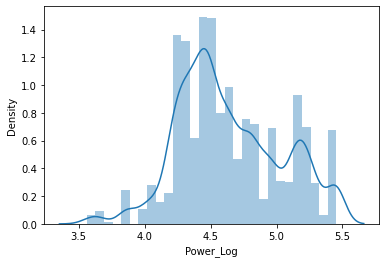

In [81]:
# Let's visualize the Power_Log column to verify that its skew is decreased.

sns.distplot(df['Power_Log'])

___
### Remove Kilometers_Driven outliers

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Density'>

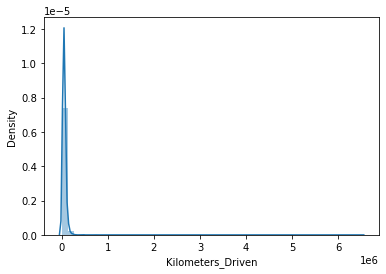

In [82]:
# Let's visualize the Kilometers_Driven column

sns.distplot(df['Kilometers_Driven'])

There appears to be an extreme outlier in the Kilometers Driven column.  We cannot be sure why this value is so high compared to the others, but it is likely a mistake, so let's remove it.

In [83]:
df[df['Kilometers_Driven'] == df['Kilometers_Driven'].max()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make,Model,Year_Bin,Engine_Log,Power_Log
2328,2328.0,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,232.75,5.0,NaN,65.0,BMW,X5 xDrive 30d M Sport,2016-2020,8.004366,5.454252


In [84]:
# Drop the outlier based on its index value

df.drop([2328], axis=0, inplace=True)

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Density'>

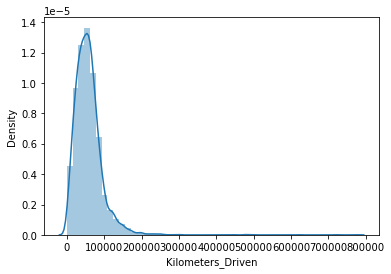

In [85]:
# Let's visualize the Kilometers_Driven column again, now that the extreme outlier has been removed.

sns.distplot(df['Kilometers_Driven'])

Although the extreme outlier has been removed, the distribution is still very skewed.  I will remove more outliers so the model performs better.

In [86]:
# Calculate the value of the upper whisker

Upper_Whisker = (df['Kilometers_Driven'].quantile(0.75) + 1.5*(df['Kilometers_Driven'].quantile(0.75)-df['Kilometers_Driven'].quantile(0.25)))


# Create a new column that contains only the values that are less than the upper whisker

df['Kilos_Clip'] = df.loc[df['Kilometers_Driven']<Upper_Whisker, 'Kilometers_Driven']


# Drop the rows for which Kilos_Clip is NaN

df.dropna(axis=0, how='any', subset=['Kilos_Clip'], inplace=True)

<AxesSubplot:xlabel='Kilos_Clip', ylabel='Density'>

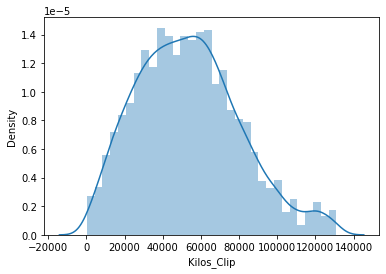

In [87]:
# Let's visualize the Kilos_Clip column to verify that it is less skewed.

sns.distplot(df['Kilos_Clip'])

___
### Remove Price outliers

<AxesSubplot:xlabel='Price', ylabel='Density'>

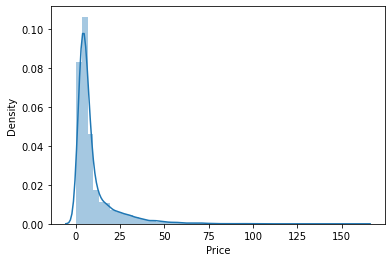

In [88]:
# Let's visualize the Price column

sns.distplot(df['Price'])

The distribution is skewed right.  This means that most cars cost less than about 25 lakh, but some are substantially more expensive - as high as 150 lakh.

In [89]:
# Which cars are so pricey?

df[df['Price']>90]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make,Model,Year_Bin,Engine_Log,Power_Log,Kilos_Clip
1505,1505.0,Land Rover Range Rover Sport SE,Kochi,2019,26013,Diesel,Automatic,First,12.65,2993.0,232.75,5.0,1.39 Cr,97.07,Land,Rover Range Rover Sport SE,2016-2020,8.004366,5.454252,26013.0
1974,1974.0,BMW 7 Series 740Li,Coimbatore,2018,28060,Petrol,Automatic,First,12.05,2979.0,232.75,5.0,NaN,93.67,BMW,7 Series 740Li,2016-2020,7.999679,5.454252,28060.0
1984,1984.0,BMW 7 Series 740Li,Bangalore,2017,17465,Petrol,Automatic,First,12.05,2979.0,232.75,5.0,NaN,93.00,BMW,7 Series 740Li,2016-2020,7.999679,5.454252,17465.0
4079,4079.0,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,232.75,5.0,2.3 Cr,160.00,Land,Rover Range Rover 3.0 Diesel LWB Vogue,2016-2020,8.004366,5.454252,25000.0
5781,5781.0,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.40,3163.0,232.75,2.0,NaN,120.00,Lamborghini,Gallardo Coupe,2011-2015,8.059592,5.454252,6500.0
5919,5919.0,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,12.50,3163.0,232.75,2.0,NaN,100.00,Jaguar,F Type 5.0 V8 S,2011-2015,8.059592,5.454252,8000.0


Although some of these cars are drastically more expensive than the others, it's not by mistake.  Lamborghinis, for example, are extremely pricey.  

However, the existence of such extreme outliers will negatively impact the performance of my model, so I will remove them.

In [90]:
# Calculate the value of the upper whisker

Upper_Whisker_Price = (df['Price'].quantile(0.75) + 1.5*(df['Price'].quantile(0.75)-df['Price'].quantile(0.25)))


# Create a new column that contains only the values that are less than the upper whisker

df['Price_Clip'] = df.loc[df['Price']<Upper_Whisker_Price, 'Price']


# Drop the rows for which Price_Clip is NaN

df.dropna(axis=0, how='any', subset=['Price_Clip'], inplace=True)

<AxesSubplot:xlabel='Price_Clip', ylabel='Density'>

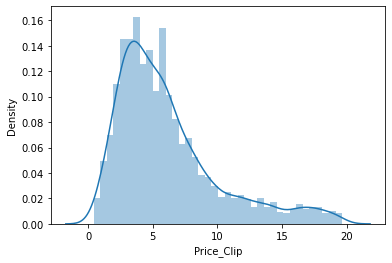

In [91]:
# Let's visualize the Price_Clip column to verify that it is less skewed.

sns.distplot(df['Price_Clip'])

Removing outliers made the distribution closer to normal, but it could still be better.  I will convert it to a log scale.

<AxesSubplot:xlabel='Price_Log', ylabel='Density'>

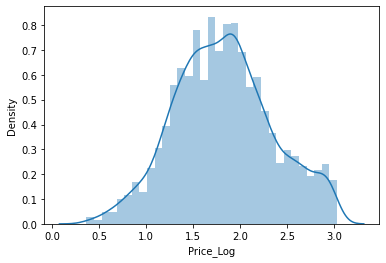

In [92]:
# Create a new column for the log scaled version of the Price column.

df['Price_Log'] = np.log(df['Price_Clip']+1)
sns.distplot(df['Price_Log'])

In [93]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,New_Price,Price,Make,Model,Year_Bin,Engine_Log,Power_Log,Kilos_Clip,Price_Clip,Price_Log
0,5.0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,...,NaN,1.75,Maruti,Wagon R LXI CNG,2006-2010,6.906755,4.080246,72000.0,1.75,1.011601
1,1.0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,...,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option,2011-2015,7.367077,4.845761,41000.0,12.50,2.602690
2,2.0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,...,8.61 Lakh,4.50,Honda,Jazz V,2011-2015,7.090077,4.496471,46000.0,4.50,1.704748
3,3.0,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,...,NaN,6.00,Maruti,Ertiga VDI,2011-2015,7.130099,4.497139,87000.0,6.00,1.945910
4,4.0,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,...,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic,2011-2015,7.585281,4.954418,40670.0,17.74,2.930660


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5068 entries, 0 to 6018
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              5068 non-null   float64 
 1   Name               5068 non-null   object  
 2   Location           5068 non-null   category
 3   Year               5068 non-null   int64   
 4   Kilometers_Driven  5068 non-null   int64   
 5   Fuel_Type          5068 non-null   category
 6   Transmission       5068 non-null   category
 7   Owner_Type         5068 non-null   category
 8   Mileage            5068 non-null   float64 
 9   Engine             5068 non-null   float64 
 10  Power              5068 non-null   float64 
 11  Seats              5068 non-null   float64 
 12  New_Price          644 non-null    object  
 13  Price              5068 non-null   float64 
 14  Make               5068 non-null   object  
 15  Model              5068 non-null   object  
 16  Year_B

___
___

## <a id='link5'>5. Train and Test </a>

In [95]:
# First, I will make a new data fram that only contains the columns I want to include in my model.

model = df[['Year_Bin', 'Location', 'Kilos_Clip', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine_Log', 'Power_Log', 'Seats', 'Make', 'Price_Log']].copy()
model.head()

,Year_Bin,Location,Kilos_Clip,Fuel_Type,Transmission,Owner_Type,Mileage,Engine_Log,Power_Log,Seats,Make,Price_Log
0,2006-2010,Mumbai,72000.0,CNG,Manual,First,26.60,6.906755,4.080246,5.0,Maruti,1.011601
1,2011-2015,Pune,41000.0,Diesel,Manual,First,19.67,7.367077,4.845761,5.0,Hyundai,2.602690
2,2011-2015,Chennai,46000.0,Petrol,Manual,First,18.20,7.090077,4.496471,5.0,Honda,1.704748
3,2011-2015,Chennai,87000.0,Diesel,Manual,First,20.77,7.130099,4.497139,7.0,Maruti,1.945910
4,2011-2015,Coimbatore,40670.0,Diesel,Automatic,Second,15.20,7.585281,4.954418,5.0,Audi,2.930660


In [96]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5068 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Year_Bin      5068 non-null   category
 1   Location      5068 non-null   category
 2   Kilos_Clip    5068 non-null   float64 
 3   Fuel_Type     5068 non-null   category
 4   Transmission  5068 non-null   category
 5   Owner_Type    5068 non-null   category
 6   Mileage       5068 non-null   float64 
 7   Engine_Log    5068 non-null   float64 
 8   Power_Log     5068 non-null   float64 
 9   Seats         5068 non-null   float64 
 10  Make          5068 non-null   object  
 11  Price_Log     5068 non-null   float64 
dtypes: category(5), float64(6), object(1)
memory usage: 342.6+ KB


In [97]:
# Get dummy variables for categorical columns.  Create independent variables.

X = model.drop(['Price_Log'], axis=1)
X = pd.get_dummies(X, columns=['Year_Bin', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Make'], drop_first=True)

In [98]:
X.head()

,Kilos_Clip,Mileage,Engine_Log,Power_Log,Year_Bin_2001-2005,Year_Bin_2006-2010,Year_Bin_2011-2015,Year_Bin_2016-2020,Location_Bangalore,Location_Chennai,...,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
0,72000.0,26.60,6.906755,4.080246,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41000.0,19.67,7.367077,4.845761,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,46000.0,18.20,7.090077,4.496471,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,87000.0,20.77,7.130099,4.497139,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,40670.0,15.20,7.585281,4.954418,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5068 entries, 0 to 6018
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Kilos_Clip                 5068 non-null   float64
 1   Mileage                    5068 non-null   float64
 2   Engine_Log                 5068 non-null   float64
 3   Power_Log                  5068 non-null   float64
 4   Year_Bin_2001-2005         5068 non-null   uint8  
 5   Year_Bin_2006-2010         5068 non-null   uint8  
 6   Year_Bin_2011-2015         5068 non-null   uint8  
 7   Year_Bin_2016-2020         5068 non-null   uint8  
 8   Location_Bangalore         5068 non-null   uint8  
 9   Location_Chennai           5068 non-null   uint8  
 10  Location_Coimbatore        5068 non-null   uint8  
 11  Location_Delhi             5068 non-null   uint8  
 12  Location_Hyderabad         5068 non-null   uint8  
 13  Location_Jaipur            5068 non-null   uint8

In [100]:
# State y (dependent) variable for model

y = model[['Price_Log']]

In [101]:
# Split data into train and test groups

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=18)

In [102]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [103]:
pred = lr.predict(X_test)

In [104]:
print(f"Mean ABS error is {mean_absolute_error(y_pred=pred,y_true=y_test)}")
print(f"R squared error is {r2_score(y_pred=pred,y_true=y_test)}")

Mean ABS error is 0.15461164411125788
R squared error is 0.8593110454326984


In [105]:
X_train[['Kilos_Clip', 'Mileage', 'Engine_Log', 'Power_Log']] = StandardScaler().fit_transform(X_train[['Kilos_Clip', 'Mileage', 'Engine_Log', 'Power_Log']])
X_test[['Kilos_Clip', 'Mileage', 'Engine_Log', 'Power_Log']] = StandardScaler().fit_transform(X_test[['Kilos_Clip', 'Mileage', 'Engine_Log', 'Power_Log']])


In [106]:
X_train.head()

,Kilos_Clip,Mileage,Engine_Log,Power_Log,Year_Bin_2001-2005,Year_Bin_2006-2010,Year_Bin_2011-2015,Year_Bin_2016-2020,Location_Bangalore,Location_Chennai,...,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
5425,0.121810,1.266254,-0.812648,-0.857449,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4082,1.151318,0.792298,-0.582678,-0.700463,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3407,1.019931,-0.698330,1.433356,1.156711,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5576,-1.693361,-0.450302,0.371875,0.739004,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5937,0.660601,-1.668344,1.433356,0.707631,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
coef_df = pd.DataFrame(
    np.append(lr.coef_[0], lr.intercept_[0]),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
Kilos_Clip,-2.517245e-06
Mileage,-2.471019e-03
Engine_Log,2.289967e-01
Power_Log,6.222954e-01
Year_Bin_2001-2005,4.892146e-02
Year_Bin_2006-2010,3.730891e-01
Year_Bin_2011-2015,7.485907e-01
Year_Bin_2016-2020,1.008527e+00
Location_Bangalore,9.416577e-02
Location_Chennai,-3.665332e-02


___
___

## <a id='link6'>6. Linear Regression with statsmodels </a>

In [108]:
X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=18
)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_Log   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     387.7
Date:                Fri, 18 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:06:17   Log-Likelihood:                 775.18
No. Observations:                3547   AIC:                            -1434.
Df Residuals:                    3489   BIC:                            -1076.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])], index=X_train1.columns
)
print("VIF Scores: \n\n{}\n".format(vif_series1))

VIF Scores: 

const                          0.000000
Kilos_Clip                     1.936487
Mileage                        4.278955
Engine_Log                    11.419929
Power_Log                      7.253320
Year_Bin_2001-2005            11.917438
Year_Bin_2006-2010            68.345089
Year_Bin_2011-2015           129.896812
Year_Bin_2016-2020           105.523700
Location_Bangalore             2.242706
Location_Chennai               3.015974
Location_Coimbatore            3.409276
Location_Delhi                 3.334902
Location_Hyderabad             3.839981
Location_Jaipur                2.909417
Location_Kochi                 3.649437
Location_Kolkata               3.589045
Location_Mumbai                4.173361
Location_Pune                  3.545060
Fuel_Type_Diesel              22.595306
Fuel_Type_Electric                  NaN
Fuel_Type_LPG                  1.249710
Fuel_Type_Petrol              24.078195
Transmission_Manual            1.764418
Owner_Type_Fourth & Above 

In [110]:
X_train2 = X_train1.drop('Year_Bin_2011-2015', axis=1)

In [111]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])], index=X_train2.columns
)
print("VIF Scores: \n\n{}\n".format(vif_series2))

VIF Scores: 

const                         0.000000
Kilos_Clip                    1.928889
Mileage                       4.243833
Engine_Log                   11.417219
Power_Log                     7.244012
Year_Bin_2001-2005            1.200023
Year_Bin_2006-2010            1.419186
Year_Bin_2016-2020            1.594363
Location_Bangalore            2.242601
Location_Chennai              3.015821
Location_Coimbatore           3.409144
Location_Delhi                3.334788
Location_Hyderabad            3.839963
Location_Jaipur               2.907247
Location_Kochi                3.649396
Location_Kolkata              3.587915
Location_Mumbai               4.173028
Location_Pune                 3.545059
Fuel_Type_Diesel             22.590917
Fuel_Type_Electric                 NaN
Fuel_Type_LPG                 1.249622
Fuel_Type_Petrol             24.078093
Transmission_Manual           1.764374
Owner_Type_Fourth & Above     1.019670
Owner_Type_Second             1.168074
Owner_Type_

In [112]:
X_train3 = X_train2.drop('Fuel_Type_Petrol', axis=1)

In [113]:
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])], index=X_train3.columns
)
print("VIF Scores: \n\n{}\n".format(vif_series3))

VIF Scores: 

const                         0.000000
Kilos_Clip                    1.919923
Mileage                       3.932191
Engine_Log                   11.084056
Power_Log                     7.190015
Year_Bin_2001-2005            1.200022
Year_Bin_2006-2010            1.419116
Year_Bin_2016-2020            1.591591
Location_Bangalore            2.242441
Location_Chennai              3.014947
Location_Coimbatore           3.407944
Location_Delhi                3.334783
Location_Hyderabad            3.839602
Location_Jaipur               2.904854
Location_Kochi                3.649249
Location_Kolkata              3.586757
Location_Mumbai               4.169408
Location_Pune                 3.544793
Fuel_Type_Diesel              3.306079
Fuel_Type_Electric                 NaN
Fuel_Type_LPG                 1.018902
Transmission_Manual           1.764177
Owner_Type_Fourth & Above     1.019628
Owner_Type_Second             1.167803
Owner_Type_Third              1.130447
Seats_4.0  

In [114]:
X_train4 = X_train3.drop('Engine_Log', axis=1)

In [115]:
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])], index=X_train4.columns
)
print("VIF Scores: \n\n{}\n".format(vif_series4))

VIF Scores: 

const                        0.000000
Kilos_Clip                   1.910013
Mileage                      3.358777
Power_Log                    3.266527
Year_Bin_2001-2005           1.198743
Year_Bin_2006-2010           1.413688
Year_Bin_2016-2020           1.591438
Location_Bangalore           2.242020
Location_Chennai             3.014386
Location_Coimbatore          3.407560
Location_Delhi               3.333910
Location_Hyderabad           3.836195
Location_Jaipur              2.902789
Location_Kochi               3.648866
Location_Kolkata             3.586740
Location_Mumbai              4.169226
Location_Pune                3.544599
Fuel_Type_Diesel             2.504889
Fuel_Type_Electric                NaN
Fuel_Type_LPG                1.018790
Transmission_Manual          1.763888
Owner_Type_Fourth & Above    1.019624
Owner_Type_Second            1.167658
Owner_Type_Third             1.130368
Seats_4.0                         inf
Seats_5.0                         in

In [116]:
olsmod4 = sm.OLS(y_train, X_train4)
olsres4 = olsmod4.fit()
print(olsres4.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_Log   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     390.9
Date:                Fri, 18 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:06:20   Log-Likelihood:                 703.53
No. Observations:                3547   AIC:                            -1297.
Df Residuals:                    3492   BIC:                            -957.5
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [117]:
X_train6 = X_train4.drop('Location_Kochi', axis=1)

In [118]:
olsmod6 = sm.OLS(y_train, X_train6)
olsres6 = olsmod6.fit()
print(olsres6.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_Log   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     398.3
Date:                Fri, 18 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:06:20   Log-Likelihood:                 703.53
No. Observations:                3547   AIC:                            -1299.
Df Residuals:                    3493   BIC:                            -965.7
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [119]:
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])], index=X_train4.columns
)
print("VIF Scores: \n\n{}\n".format(vif_series4))

VIF Scores: 

const                        0.000000
Kilos_Clip                   1.910013
Mileage                      3.358777
Power_Log                    3.266527
Year_Bin_2001-2005           1.198743
Year_Bin_2006-2010           1.413688
Year_Bin_2016-2020           1.591438
Location_Bangalore           2.242020
Location_Chennai             3.014386
Location_Coimbatore          3.407560
Location_Delhi               3.333910
Location_Hyderabad           3.836195
Location_Jaipur              2.902789
Location_Kochi               3.648866
Location_Kolkata             3.586740
Location_Mumbai              4.169226
Location_Pune                3.544599
Fuel_Type_Diesel             2.504889
Fuel_Type_Electric                NaN
Fuel_Type_LPG                1.018790
Transmission_Manual          1.763888
Owner_Type_Fourth & Above    1.019624
Owner_Type_Second            1.167658
Owner_Type_Third             1.130368
Seats_4.0                         inf
Seats_5.0                         in

• The VIF values of the model have been reduced to less than 5, therefore multicollinearity has been minimized.

• The p-values of the model have been reduced to less than 0.05 (for the non-categorical variables for which at least one column from that category is signficant).

• The R^2 value is 0.858, and the adjusted R^2 value is 0.856.  These are quite high and quite similar, so I am satisfied with this model.

• Negative values of the coefficient show that Price decreases with the increase of corresponding attribute value.

• Positive values of the coefficient show that Price increases with the increase of corresponding attribute value.

___
___

## <a id='link7'>7. Checking Assumptions </a>

### Check for Linearity

In [120]:
residual = olsres4.resid
np.mean(residual)

1.9855996056708783e-15

The mean of the residuals is approximately equal to 0.

In [121]:
residual = olsres4.resid
fitted = olsres4.fittedvalues

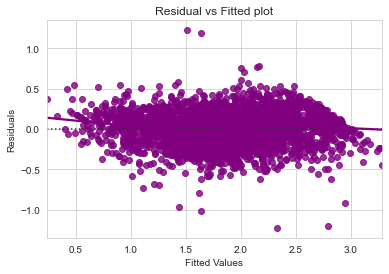

In [122]:
sns.set_style("whitegrid")
sns.residplot(fitted, residual, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted plot")
plt.show()

The residuals show no obvious pattern, therefore we can assume linearity.

### Check for Normality

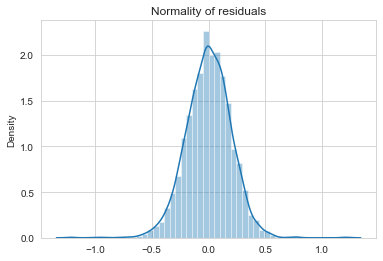

In [123]:
sns.distplot(residual)
plt.title("Normality of residuals")
plt.show()

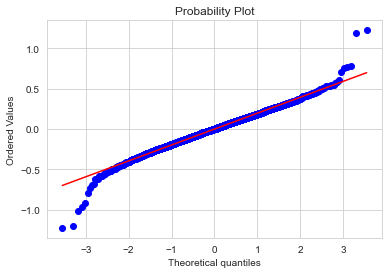

In [124]:
import pylab
import scipy.stats as stats

stats.probplot(residual, dist="norm", plot=pylab)
plt.show()

The distribution appears approximately normal, therefore the assumption is satisfied.

### Check for Homoscedasticity

In [125]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residual, X_train4)
lzip(name, test)

[('F statistic', 0.8622590696366699), ('p-value', 0.9989423169013689)]

The null hypothesis is that the residuals are homoscedastic.
The alternative hypothesis is that the residuals are heteroscedastic.
The p-value is 0.9989... which is much greater than the alpha value of 0.05.
Therefore, we fail to reject the null hypothesis and conclude that the residuals are homoscedastic.

### Check the Test Data

In [126]:
# defining function for MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# defining common function for all metrics
def model_perf(model, inp, out):
    """
    model: model
    inp: independent variables
    out: dependent variable
    """
    y_pred = model.predict(inp).flatten()
    y_act = out.values.flatten()

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },
        index=[0],
    )

In [127]:
# Checking model performance on train set (seen 70% data)
print("Train Performance\n")
model_perf(olsres4, X_train4.values, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,0.153634,9.533052,0.198437,0.858039


In [128]:
# Selecting columns from test data that we used to create our final model
X_test_final = X_test[X_train4.columns]

In [129]:
# Checking model performance on test set (seen 70% data)
print("Test Performance\n")
model_perf(olsres4, X_test_final.values, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,0.15576,9.68033,0.197238,0.856426


___
___

## <a id='link8'>8. Conclusions </a>

• olsres4 is my final model.  It follows all assumptions and has a high R^2 value, both in the training data as well as the test data.

• Power has a strong positive impact on the price of the vehicle.  The more power the engine has, the more we can sell the vehicle for.

• The age of the vehicle (the Year it was manufactured) also has a strong impact on the price of the vehicle.  The newest vehicles sell for the most (as indicated by the 0.2570 coefficient), while older vehicles sell for less (as indicated by the -0.3624 and -0.6794 coefficients).

• Some car makes increase the price of the vehicle as you would expect (such as the high positive coefficients for Mini, Landrover, BMW, and Audi), but it is not as a rule.  For example, Porsche has a high negative coefficient, indicating that the model predicts they should be priced lower.